<a href="https://colab.research.google.com/github/giancarlohc/Applied-AI-in-Transportation/blob/svavar/Project/ProjectCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Processing


## 1.1 Loading Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install researchpy calmap
import researchpy as rp
import calmap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

url = "https://raw.githubusercontent.com/giancarlohc/Applied-AI-in-Transportation/main/ProjectAssignmentData/Dataset-PT.csv"
dataset = pd.read_csv(url,skiprows=[0])

## 1.2 Data Exploration

In [23]:
dataset

Calendar_date  route_id  bus_id  stop_sequence  arrival_delay  \
0            20220108         4   41344              1            151   
1            20220108         4   41344              2            185   
2            20220108         4   41344              3            186   
3            20220108         4   41344              4            202   
4            20220108         4   41344              5            242   
...               ...       ...     ...            ...            ...   
545098       20220630         4   41362             23            344   
545099       20220630         4   41362             24            330   
545100       20220630         4   41362             25            339   
545101       20220630         4   41362             26            331   
545102       20220630         4   41362             27            264   

        dwell_time  travel_time_for_previous_section  scheduled_travel_time  \
0                0                                 0                    120   
1               24                               171                     45   
2                0                                55                     41   
3               12                                42                     94   
4               21                                98                     86   
...            ...                               ...                    ...   
545098          13                                74                     44   
545099          15                                34                     92   
545100          17                                63                     43   
545101           0                                35                     58   
545102           0                                50                    107   

        upstream_stop_delay  origin_delay  ...  factor(weather)Rain  \
0                       100           100  ...                    0   
1                       151           100  ...                    0   
2                       185           100  ...                    0   
3                       186           100  ...                    0   
4                       202           100  ...                    0   
...                     ...           ...  ...                  ...   
545098                  341            12  ...                    0   
545099                  344            12  ...                    0   
545100                  330            12  ...                    0   
545101                  339            12  ...                    0   
545102                  331            12  ...                    0   

        factor(weather)Snow  factor(temperature)Cold  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   
...                     ...                      ...   
545098                    0                        0   
545099                    0                        0   
545100                    0                        0   
545101                    0                        0   
545102                    0                        0   

        factor(temperature)Extra_cold factor(temperature)Normal  \
0                                   0                         1   
1                                   0                         1   
2                                   0                         1   
3                                   0                         1   
4                                   0                         1   
...                               ...                       ...   
545098                              0                         1   
545099                              0                         1   
545100                              0                

In [24]:
np.mean(dataset)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Calendar_date                        2.022036e+07
route_id                             4.000000e+00
bus_id                               4.296080e+04
stop_sequence                        1.400000e+01
arrival_delay                        1.349722e+02
dwell_time                           3.199467e+01
travel_time_for_previous_section     7.144097e+01
scheduled_travel_time                1.059184e+02
upstream_stop_delay                  1.356519e+02
origin_delay                         7.510724e+01
previous_bus_delay                   1.343793e+02
previous_trip_travel_time            7.318384e+01
traffic_condition                    7.315493e+01
recurrent_delay                      7.275001e+01
factor(weather)Light_Rain            2.446877e-02
factor(weather)Light_Snow            1.783149e-02
factor(weather)Normal                9.447224e-01
factor(weather)Rain                  6.191490e-03
factor(weather)Snow                  6.785873e-03
factor(temperature)Cold              1.127347e-01


In [1]:
plt.hist(dataset["arrival_delay"])

NameError: ignored

In [ ]:
dataset.boxplot(column=["arrival_delay","dwell_time","travel_time_for_previous_section","scheduled_travel_time"])

In [ ]:
dataset.boxplot(column=["upstream_stop_delay","origin_delay","previous_bus_delay","previous_trip_travel_time","traffic_condition","recurrent_delay"])

In [ ]:
np.unique(dataset.isna())

In [ ]:
correlation_matrix = dataset[["arrival_delay","dwell_time","travel_time_for_previous_section","scheduled_travel_time","upstream_stop_delay","origin_delay","previous_bus_delay","previous_trip_travel_time","traffic_condition","recurrent_delay"]].corr()

In [ ]:
plt.figure(figsize=(10, 8))  # Set figure size for better visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
rp.summary_cat(dataset[["weather", "temperature","day_of_week","time_of_day"]])

In [ ]:
plt.hist(dataset["Calendar_date"])

In [ ]:

dates = pd.to_datetime(dataset['Calendar_date'], format='%Y%m%d')

date_frequencies = dates.value_counts().sort_index()

plt.figure(figsize=(12, 6))
date_frequencies.plot(kind='line', linestyle='-', marker='o')
plt.title("Date Frequency")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(16, 10))
calmap.yearplot(date_frequencies, year=2022)
plt.title("Date Frequency Heatmap for 2022")
plt.show()

In [ ]:
dates

In [ ]:
dataset[0:5]['scheduled_travel_time'].sum()/60

## 1.3 Creation of Training Datasets

### 1.3.1 Creation of Datasets with 1,5,10,15,20 Stop Prediction

In [6]:
count = 0
delayed5 = pd.DataFrame()
delayed10 = pd.DataFrame()
delayed15 = pd.DataFrame()
delayed20 = pd.DataFrame()
for k in set(dataset['Calendar_date']):
  buses = set(dataset[dataset["Calendar_date"]==k]["bus_id"])
  for j in buses:
    pullout = dataset[(dataset['bus_id'] == j) & (dataset['Calendar_date'] == k)]

    pullout5 = pullout.copy()
    pullout5['delayed_delay'] = pullout5['arrival_delay'].shift(-4)
    pullout5 = pullout5.dropna()
    delayed5 = pd.concat((delayed5,pullout5),axis=0)

    pullout10 = pullout.copy()
    pullout10['delayed_delay'] = pullout10['arrival_delay'].shift(-9)
    pullout10 = pullout10.dropna()
    delayed10 = pd.concat((delayed10,pullout10),axis=0)

    pullout15 = pullout.copy()
    pullout15['delayed_delay'] = pullout15['arrival_delay'].shift(-14)
    pullout15 = pullout15.dropna()
    delayed15 = pd.concat((delayed15,pullout15),axis=0)

    pullout20 = pullout.copy()
    pullout20['delayed_delay'] = pullout20['arrival_delay'].shift(-19)
    pullout20 = pullout20.dropna()
    delayed20 = pd.concat((delayed20,pullout20),axis=0)

In [11]:
delayed5.to_csv('delayed5.csv', index=False, encoding='utf-8')
delayed10.to_csv('delayed10.csv', index=False, encoding='utf-8')
delayed15.to_csv('delayed15.csv', index=False, encoding='utf-8')
delayed20.to_csv('delayed20.csv', index=False, encoding='utf-8')

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [17]:
#delayed5.to_csv('delayed5.csv', index=False, encoding='utf-8')
#delayed10.to_csv('delayed10.csv', index=False, encoding='utf-8')
#delayed15.to_csv('delayed15.csv', index=False, encoding='utf-8')
#delayed20.to_csv('delayed20.csv', index=False, encoding='utf-8')

delayed5 = pd.read_csv('delayed5.csv')
delayed10 = pd.read_csv('delayed10.csv')
delayed15 = pd.read_csv('delayed15.csv')
delayed20 = pd.read_csv('delayed20.csv')

### 1.3.2 Normalizing the Datasets

Z-Score normalization handles outliers better (many in the dataset and important to detect)

In [18]:
columnnames = dataset.columns
numericcolumns = columnnames[4:14].tolist()
numericcolumns.append("delayed_delay")
factorcolumns = columnnames[18:].tolist()
columnstouse = numericcolumns + factorcolumns

In [5]:
scaler = StandardScaler()
delayed5[numericcolumns] = scaler.fit_transform(delayed5[numericcolumns])
delayed10[numericcolumns] = scaler.fit_transform(delayed10[numericcolumns])
delayed15[numericcolumns] = scaler.fit_transform(delayed15[numericcolumns])
delayed20[numericcolumns] = scaler.fit_transform(delayed20[numericcolumns])

In [19]:
delayed5 = delayed5[columnstouse]
delayed10 = delayed10[columnstouse]
delayed15 = delayed15[columnstouse]
delayed20 = delayed20[columnstouse]

In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
delayed5.iloc[:1000,:]
#first_50_columns = delayed5.iloc[:50, :]
#first_50_columns
#Is the rows in the right order? if yes then the delayed delay is wrong

arrival_delay  dwell_time  travel_time_for_previous_section  \
0              -11           0                                 0   
1               33          74                               165   
2               32          30                                45   
3               -6          33                                38   
4               54          71                                85   
5               64          33                               110   
6               65          24                                29   
7               46          22                                89   
8              115         100                                94   
9              136          43                                35   
10              96          26                                96   
11              83          21                                63   
12             154          83                                73   
13             166          67                                83   
14             156          26                                84   
15             132          24                                51   
16             153          54                               111   
17             125          21                                60   
18             120          29                                38   
19              79          27                                35   
20              64          32                                43   
21              54          20                                51   
22              58          19                                43   
23              85          23                                40   
24             119          39                               119   
25             122          15                                48   
26              52          21                                61   
27             -19           0                                 0   
28              15          67                               150   
29              -4          15                                42   
30             -59          27                                35   
31             -39          45                                74   
32             -40          21                                96   
33             -59          20                                30   
34             -94          15                                73   
35             -59          74                                85   
36             -42          34                                27   
37             -84          15                               101   
38            -140          19                                72   
39             -33         118                                32   
40             -84          13                                84   
41             -93          16                                75   
42            -135           0                                62   
43             -46         116                               117   
44             -30          13                                66   
45              -6          17                                90   
46             -69           0                                76   
47             -48          55                                48   
48             -66          12                                64   
49             -56          32                                43   
50             -92           0                                33   
51             -98          15                                79   
52            -125           0                                32   
53            -194          24                                46   
54             -26           0                                 0   
55              38          83                               132   
56              45          20                                56   
57              20          30                               

### 1.3.3 Splitting the Datasets into Training and Test 80/20%

In [20]:
Y5 = delayed5["delayed_delay"]
X5 = delayed5.drop(columns=["delayed_delay","arrival_delay"])

X5_train, X5_test, Y5_train, Y5_test = train_test_split(X5, Y5, test_size=0.2, random_state=42)

Y10 = delayed10["delayed_delay"]
X10 = delayed10.drop(columns=["delayed_delay","arrival_delay"])

X10_train, X10_test, Y10_train, Y10_test = train_test_split(X10, Y10, test_size=0.2, random_state=42)

Y15 = delayed15["delayed_delay"]
X15 = delayed15.drop(columns=["delayed_delay","arrival_delay"])

X15_train, X15_test, Y15_train, Y15_test = train_test_split(X15, Y15, test_size=0.2, random_state=42)

Y20 = delayed20["delayed_delay"]
X20 = delayed20.drop(columns=["delayed_delay","arrival_delay"])

X20_train, X20_test, Y20_train, Y20_test = train_test_split(X20, Y20, test_size=0.2, random_state=42)

# 2. Model Creation

## 2.1 Model Training

### 2.1.0 Model Training Module 2 - Regression Models

In [7]:
#Test Sample
X5_train_SAMPLE =  X5_train.iloc[:500]
X5_test_SAMPLE =   X5_test.iloc[:500]
X10_train_SAMPLE = X10_train.iloc[:500]
X10_test_SAMPLE =  X10_test.iloc[:500]
X15_train_SAMPLE = X15_train.iloc[:500]
X15_test_SAMPLE =  X15_test.iloc[:500]
X20_train_SAMPLE = X20_train.iloc[:500]
X20_test_SAMPLE =  X20_test.iloc[:500]

Y5_train_SAMPLE =  Y5_train.iloc[:500]
Y5_test_SAMPLE =   Y5_test.iloc[:500]
Y10_train_SAMPLE = Y10_train.iloc[:500]
Y10_test_SAMPLE =  Y10_test.iloc[:500]
Y15_train_SAMPLE = Y15_train.iloc[:500]
Y15_test_SAMPLE =  Y15_test.iloc[:500]
Y20_train_SAMPLE = Y20_train.iloc[:500]
Y20_test_SAMPLE =  Y20_test.iloc[:500]

Y5_SAMPLE =  Y5_test.iloc[:500]
X5_SAMPLE =  X5_test.iloc[:500]
Y10_SAMPLE = Y10_test.iloc[:500]
X10_SAMPLE = X10_test.iloc[:500]
Y15_SAMPLE = Y15_test.iloc[:500]
X15_SAMPLE = X15_test.iloc[:500]
Y20_SAMPLE = Y20_test.iloc[:500]
X20_SAMPLE = X20_test.iloc[:500]

In [21]:
X5_train_SAMPLE =  X5_train
X5_test_SAMPLE =   X5_test
X10_train_SAMPLE = X10_train
X10_test_SAMPLE =  X10_test
X15_train_SAMPLE = X15_train
X15_test_SAMPLE =  X15_test
X20_train_SAMPLE = X20_train
X20_test_SAMPLE =  X20_test

Y5_train_SAMPLE =  Y5_train
Y5_test_SAMPLE =   Y5_test
Y10_train_SAMPLE = Y10_train
Y10_test_SAMPLE =  Y10_test
Y15_train_SAMPLE = Y15_train
Y15_test_SAMPLE =  Y15_test
Y20_train_SAMPLE = Y20_train
Y20_test_SAMPLE =  Y20_test

Y5_SAMPLE =  Y5_test
X5_SAMPLE =  X5_test
Y10_SAMPLE = Y10_test
X10_SAMPLE = X10_test
Y15_SAMPLE = Y15_test
X15_SAMPLE = X15_test
Y20_SAMPLE = Y20_test
X20_SAMPLE = X20_test

###Linear Regression

Mean Absolute Error: 72.71980496798304
Mean Squared Error: 11864.485785564859
R-squared: 0.6926862533972434


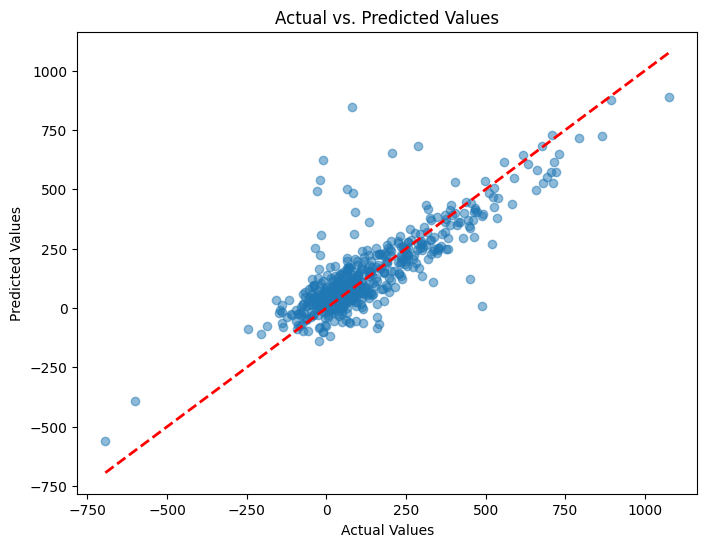

Mean Absolute Error: 106.38293205126814
Mean Squared Error: 20517.998080652975
R-squared: 0.5565787813419903


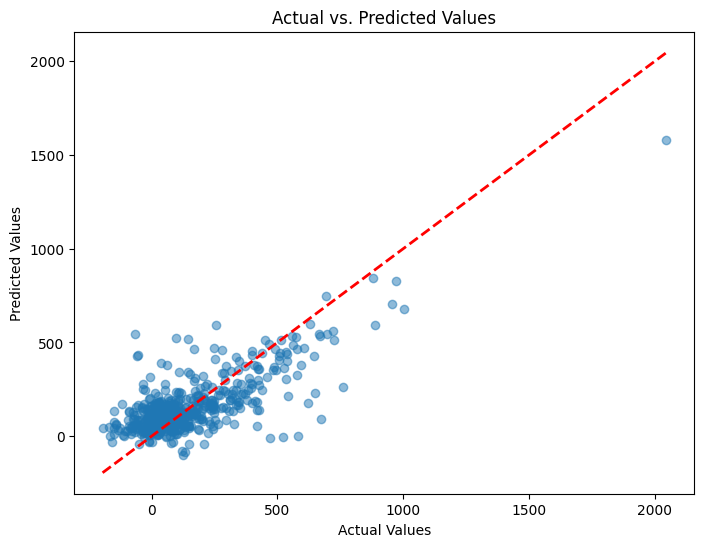

Mean Absolute Error: 120.0615608279193
Mean Squared Error: 27058.571258631375
R-squared: 0.3245431961300279


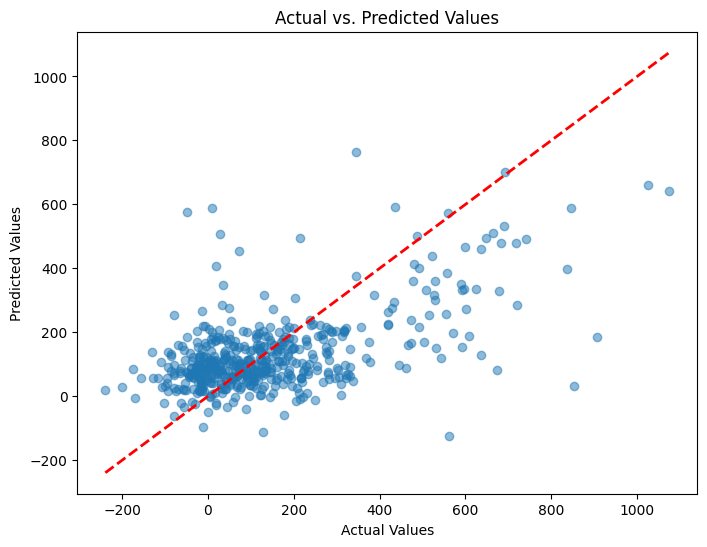

Mean Absolute Error: 130.0317412709824
Mean Squared Error: 29290.40119177432
R-squared: 0.21740288086601345


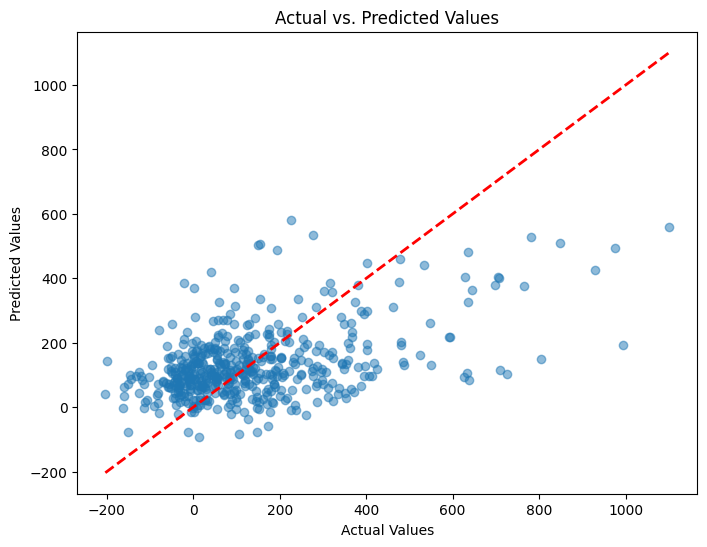

In [23]:
# Define the data sizes
data_sizes = [5, 10, 15, 20]

for size in data_sizes:
  # Create variable names based on the data size
  X_train_SAMPLE = globals()[f"X{size}_train_SAMPLE"]
  X_test_SAMPLE = globals()[f"X{size}_test_SAMPLE"]
  Y_train_SAMPLE = globals()[f"Y{size}_train_SAMPLE"]
  Y_test_SAMPLE = globals()[f"Y{size}_test_SAMPLE"]
  X_SAMPLE = globals()[f"X{size}_SAMPLE"]
  Y_SAMPLE = globals()[f"Y{size}_SAMPLE"]

  # Create a Linear Regression model
  model = LinearRegression()

  # Fit the model to the training data
  model.fit(X_train_SAMPLE, Y_train_SAMPLE)
  y_pred = model.predict(X_test_SAMPLE)

  mae = mean_absolute_error(Y_test_SAMPLE, y_pred)
  mse = mean_squared_error(Y_test_SAMPLE, y_pred)
  r2 = r2_score(Y_test_SAMPLE, y_pred)

  print(f"Mean Absolute Error: {mae}")
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")

  # y_test contains the actual target values for the test dataset
  # y_pred contains the predicted values for the test dataset

  # Create a scatter plot to visualize the relationship
  plt.figure(figsize=(8, 6))
  plt.scatter(Y_test_SAMPLE, y_pred, alpha=0.5)  # Plot actual vs. predicted values

  # Add labels and title
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title("Actual vs. Predicted Values")

  # Add a diagonal line for reference (perfect predictions)
  plt.plot([min(Y_test_SAMPLE), max(Y_test_SAMPLE)], [min(Y_test_SAMPLE), max(Y_test_SAMPLE)], linestyle='--', color='red', lw=2)

  # Show the plot
  plt.show()

###SVR Regression

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.3s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.2s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.3s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.0

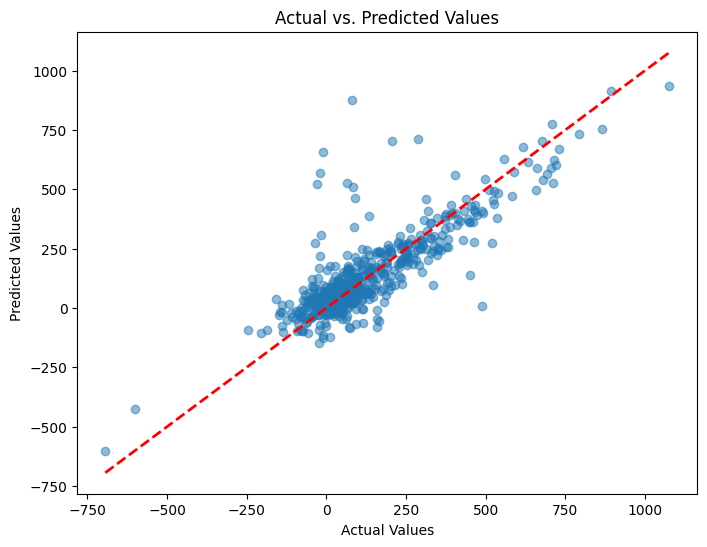

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.2s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.0

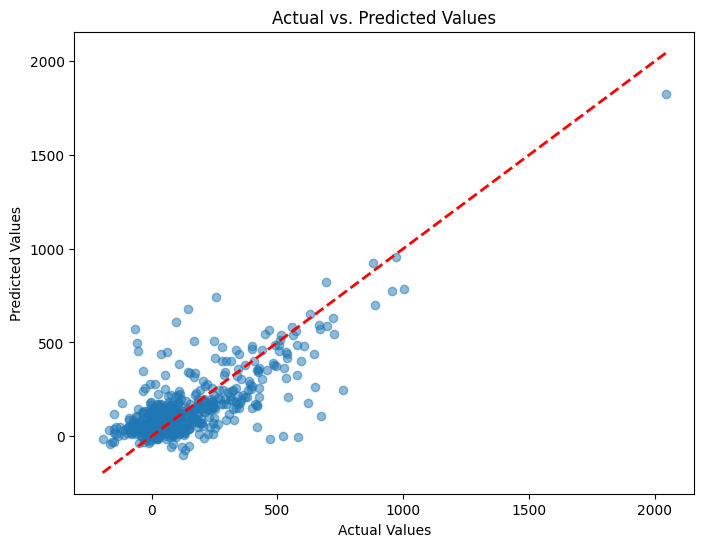

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.3s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.2s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.2s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.2s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.0

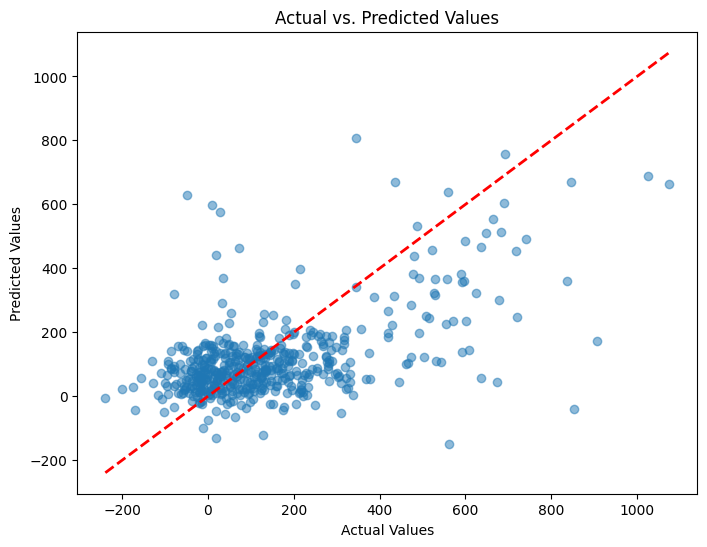

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.0

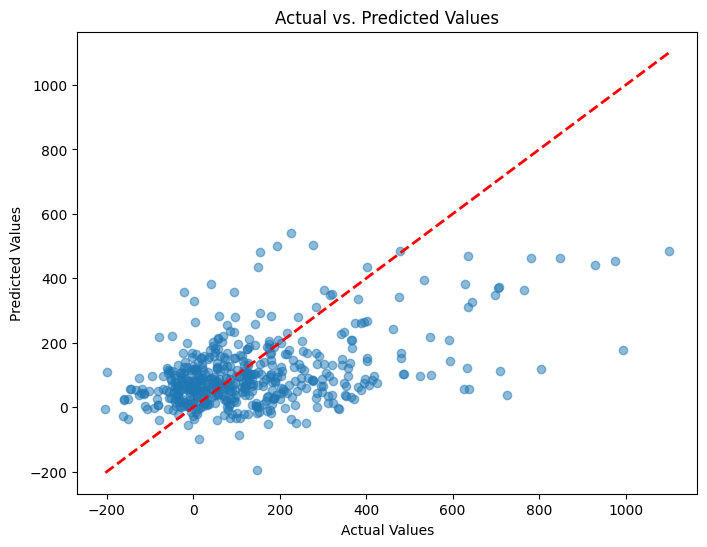

In [24]:
# Define the data sizes
data_sizes = [5, 10, 15, 20]

for size in data_sizes:
  # Create variable names based on the data size
  X_train_SAMPLE = globals()[f"X{size}_train_SAMPLE"]
  X_test_SAMPLE = globals()[f"X{size}_test_SAMPLE"]
  Y_train_SAMPLE = globals()[f"Y{size}_train_SAMPLE"]
  Y_test_SAMPLE = globals()[f"Y{size}_test_SAMPLE"]
  X_SAMPLE = globals()[f"X{size}_SAMPLE"]
  Y_SAMPLE = globals()[f"Y{size}_SAMPLE"]

  # Define a parameter grid for hyperparameter tuning
  param_grid = {
      'kernel': ['linear', 'poly', 'rbf'],
      'C': [0.1, 1, 10],
      'epsilon': [0.01, 0.1, 1, 10]
  }

  # Create the GridSearchCV object
  grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2, scoring='neg_mean_squared_error')

  # Fit the grid search to the scaled training data
  grid_search.fit(X_train_SAMPLE, Y_train_SAMPLE)

  # Get the best parameters
  best_params = grid_search.best_params_
  print("Best Parameters:", best_params)

  # Create an SVR model with the best parameters from the grid search
  best_svr = SVR(kernel=best_params['kernel'], C=best_params['C'], epsilon=best_params['epsilon'])

  # Perform cross-validation on the entire dataset
  cv_scores = cross_val_score(best_svr, X_SAMPLE , Y_SAMPLE, cv=5, verbose=2).mean()
  print(cv_scores)

  best_svr.fit(X_train_SAMPLE, Y_train_SAMPLE)

  y_pred = best_svr.predict(X_test_SAMPLE)
  mae = mean_absolute_error(Y_test_SAMPLE, y_pred)
  mse = mean_squared_error(Y_test_SAMPLE, y_pred)
  r2 = r2_score(Y_test_SAMPLE, y_pred)
  print(f"Mean Absolute Error: {mae}")
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")

  # y_test contains the actual target values for the test dataset
  # y_pred contains the predicted values for the test dataset

  # Create a scatter plot to visualize the relationship
  plt.figure(figsize=(8, 6))
  plt.scatter(Y_test_SAMPLE, y_pred, alpha=0.5)  # Plot actual vs. predicted values

  # Add labels and title
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title("Actual vs. Predicted Values")

  # Add a diagonal line for reference (perfect predictions)
  plt.plot([min(Y_test_SAMPLE), max(Y_test_SAMPLE)], [min(Y_test_SAMPLE), max(Y_test_SAMPLE)], linestyle='--', color='red', lw=2)

  # Show the plot
  plt.show()

###xGB Regression

Fitting 5 folds for each of 560 candidates, totalling 2800 fits
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END gamma=0.005,

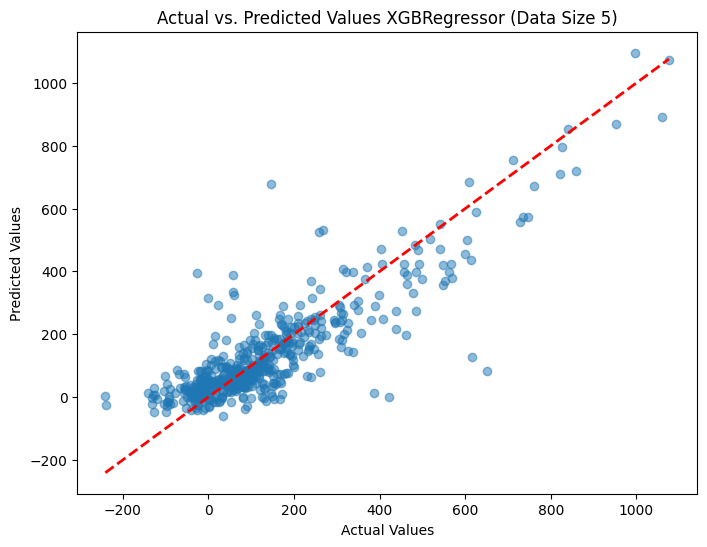

Fitting 5 folds for each of 560 candidates, totalling 2800 fits
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   1.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END gamma=0.005,

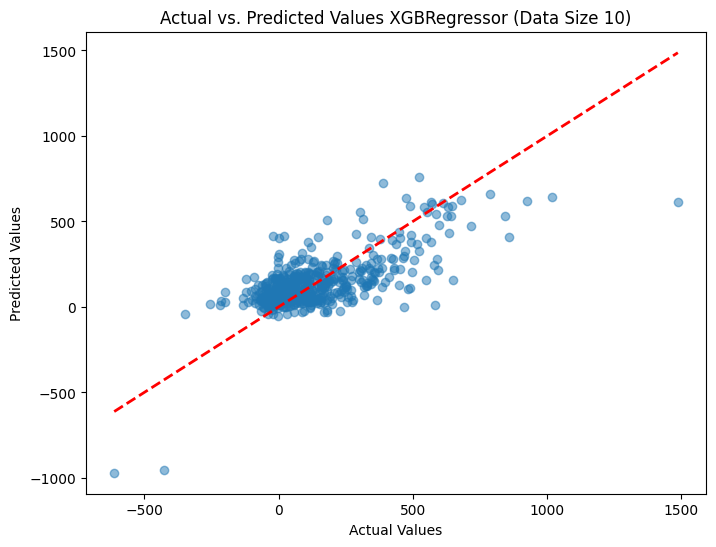

Fitting 5 folds for each of 560 candidates, totalling 2800 fits
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END gamma=0.005,

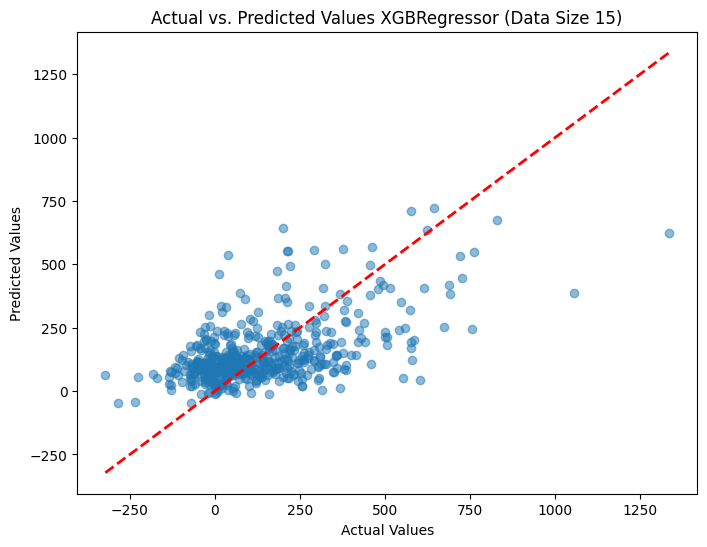

Fitting 5 folds for each of 560 candidates, totalling 2800 fits
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END gamma=0.005,

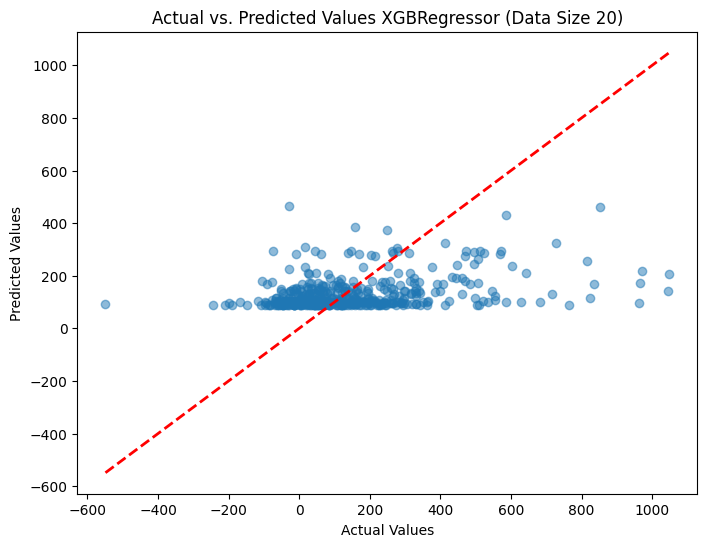

In [15]:

# Define the data sizes
data_sizes = [5, 10, 15, 20]

for size in data_sizes:
    # Create variable names based on the data size
    X_train_SAMPLE = globals()[f"X{size}_train_SAMPLE"]
    X_test_SAMPLE = globals()[f"X{size}_test_SAMPLE"]
    Y_train_SAMPLE = globals()[f"Y{size}_train_SAMPLE"]
    Y_test_SAMPLE = globals()[f"Y{size}_test_SAMPLE"]
    X_SAMPLE = globals()[f"X{size}_SAMPLE"]
    Y_SAMPLE = globals()[f"Y{size}_SAMPLE"]

    # Define hyperparameter search space and model
    params = {
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'n_estimators': [50, 100, 200, 300,400],
        'max_depth': [2,3, 4, 5],
        'gamma': [0.005,0.01, 0.1, 1, 10, 100, 200]
    }

    model = XGBRegressor()

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(model, params, cv=5, verbose=2, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_SAMPLE, Y_train_SAMPLE)

    # Get the best parameters
    best_params = grid_search.best_params_
    print(f"Best Parameters for Data Size {size}: {best_params}")
    best_score = grid_search.best_score_
    model = grid_search.best_estimator_

    # Cross-validation of the best model
    cv_scores = cross_val_score(model, X_SAMPLE, Y_SAMPLE, cv=5, verbose=1).mean()
    print(f"Cross-Validation Score for Data Size {size}: {cv_scores}")

    # Train the best model on the training data
    model.fit(X_train_SAMPLE, Y_train_SAMPLE)

    # Make predictions and evaluate the model
    y_pred = model.predict(X_test_SAMPLE)
    mae = mean_absolute_error(Y_test_SAMPLE, y_pred)
    mse = mean_squared_error(Y_test_SAMPLE, y_pred)
    r2 = r2_score(Y_test_SAMPLE, y_pred)
    print(f"Mean Absolute Error for Data Size {size}: {mae}")
    print(f"Mean Squared Error for Data Size {size}: {mse}")
    print(f"R-squared for Data Size {size}: {r2}")

    # Visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(Y_test_SAMPLE, y_pred, alpha=0.5)  # Plot actual vs. predicted values
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs. Predicted Values XGBRegressor (Data Size {size})")
    plt.plot([min(Y_test_SAMPLE), max(Y_test_SAMPLE)], [min(Y_test_SAMPLE), max(Y_test_SAMPLE)], linestyle='--', color='red', lw=2)
    plt.show()

###KNN Regression

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.1s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ................n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=2, we

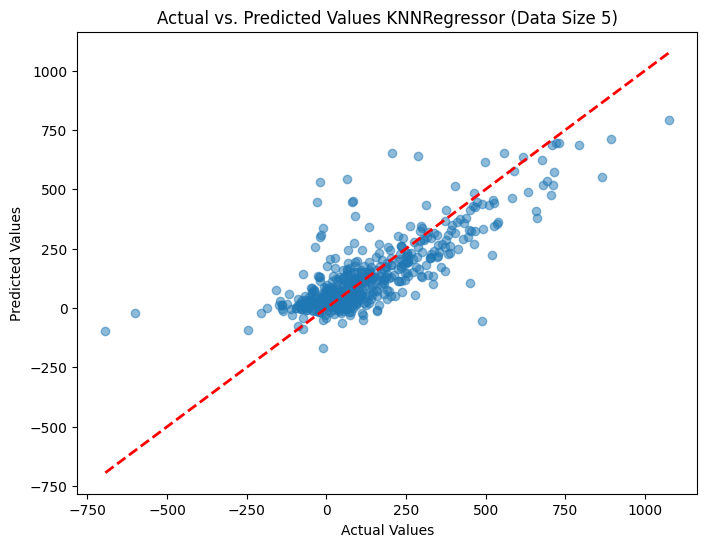

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ................n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=2, we

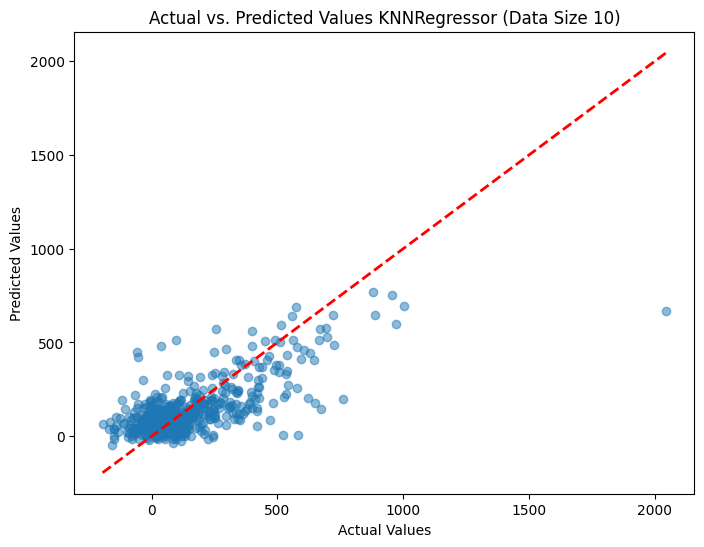

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ................n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=2, we

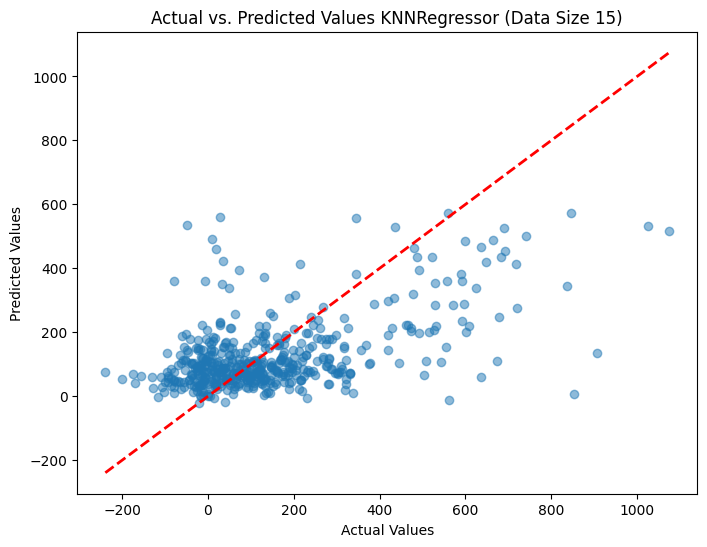

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ................n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=2, we

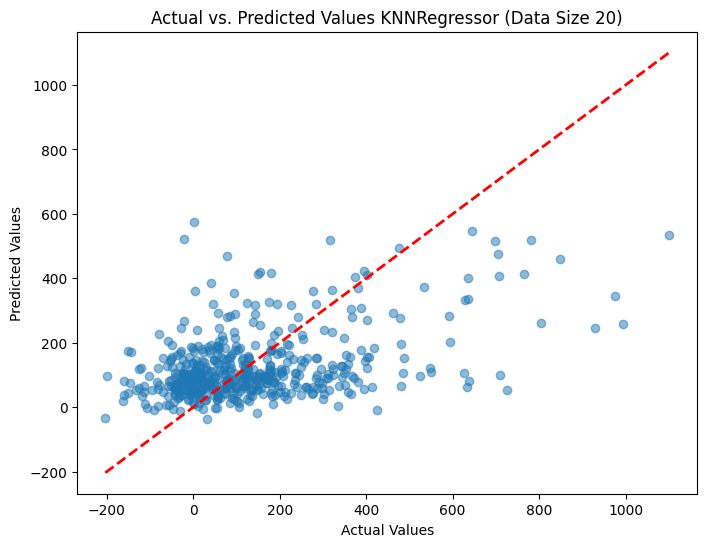

In [25]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Define the data sizes
data_sizes = [5, 10, 15, 20]

for size in data_sizes:
    # Create variable names based on the data size
    X_train_SAMPLE = globals()[f"X{size}_train_SAMPLE"]
    X_test_SAMPLE = globals()[f"X{size}_test_SAMPLE"]
    Y_train_SAMPLE = globals()[f"Y{size}_train_SAMPLE"]
    Y_test_SAMPLE = globals()[f"Y{size}_test_SAMPLE"]
    X_SAMPLE = globals()[f"X{size}_SAMPLE"]
    Y_SAMPLE = globals()[f"Y{size}_SAMPLE"]

    # Define hyperparameter search space and model
    params = {
        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]  # 1: Manhattan, 2: Euclidean
    }

    model = KNeighborsRegressor()

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(model, params, cv=5, verbose=2, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_SAMPLE, Y_train_SAMPLE)

    # Get the best parameters
    best_params = grid_search.best_params_
    print(f"Best Parameters for Data Size {size}: {best_params}")
    best_score = grid_search.best_score_
    model = grid_search.best_estimator_

    # Cross-validation of the best model
    cv_scores = cross_val_score(model, X_SAMPLE, Y_SAMPLE, cv=5, verbose=1).mean()
    print(f"Cross-Validation Score for Data Size {size}: {cv_scores}")

    # Train the best model on the training data
    model.fit(X_train_SAMPLE, Y_train_SAMPLE)

    # Make predictions and evaluate the model
    y_pred = model.predict(X_test_SAMPLE)
    mae = mean_absolute_error(Y_test_SAMPLE, y_pred)
    mse = mean_squared_error(Y_test_SAMPLE, y_pred)
    r2 = r2_score(Y_test_SAMPLE, y_pred)
    print(f"Mean Absolute Error for Data Size {size}: {mae}")
    print(f"Mean Squared Error for Data Size {size}: {mse}")
    print(f"R-squared for Data Size {size}: {r2}")

    # Visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(Y_test_SAMPLE, y_pred, alpha=0.5)  # Plot actual vs. predicted values
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs. Predicted Values KNNRegressor (Data Size {size})")
    plt.plot([min(Y_test_SAMPLE), max(Y_test_SAMPLE)], [min(Y_test_SAMPLE), max(Y_test_SAMPLE)], linestyle='--', color='red', lw=2)
    plt.show()


### 2.1.3  Model Training Module 6 - Do we need to make Reduction?

### 2.1.4 Model Training Module 7 - Nural Network Models

In [ ]:
#-------------------------------------------------network construction------------------------------------------------------------------

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=["Layers", "Dropout Rate", "Learning Rate", "MAE"])

# Search parameters
layer_configs = [[32, 64], [64, 128, 64], [128, 256, 128, 64]]
dropout_rates = [0.2, 0.3, 0.4]
learning_rates = [0.001, 0.0001]

for config in layer_configs:
    for dropout_rate in dropout_rates:
        for learning_rate in learning_rates:

            model = Sequential()

            # Add layers from config
            model.add(Dense(config[0], activation='relu', input_dim=22))
            for units in config[1:]:
                model.add(Dense(units, activation='relu'))
                model.add(Dropout(dropout_rate))

            model.add(Dense(1))

            optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
            model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])

            # Callbacks
            early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)
            reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

            # Train without verbose and without ModelCheckpoint for simplicity
            hist = model.fit(X5_train, Y5_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr], verbose=0)

            val_mae = min(hist.history['val_mae'])

            # Append results to the DataFrame
            results_df = results_df.append({
                "Layers": str(config),
                "Dropout Rate": dropout_rate,
                "Learning Rate": learning_rate,
                "MAE": val_mae
            }, ignore_index=True)

# Print the results in a tabular form
print(results_df)

# To find the best configuration, sort the DataFrame based on MAE
best_row = results_df.sort_values(by="MAE").iloc[0]
print("\nBest Configuration:")
print(best_row)

## 2.2 Model Evaluation

######### 5:5 ##########
Mean Absolute Error for 5/5: 53.262609800904215
Mean Squared Error for 5/5: 6503.874980380286
R-squared for 5/5: 0.8284989418089259


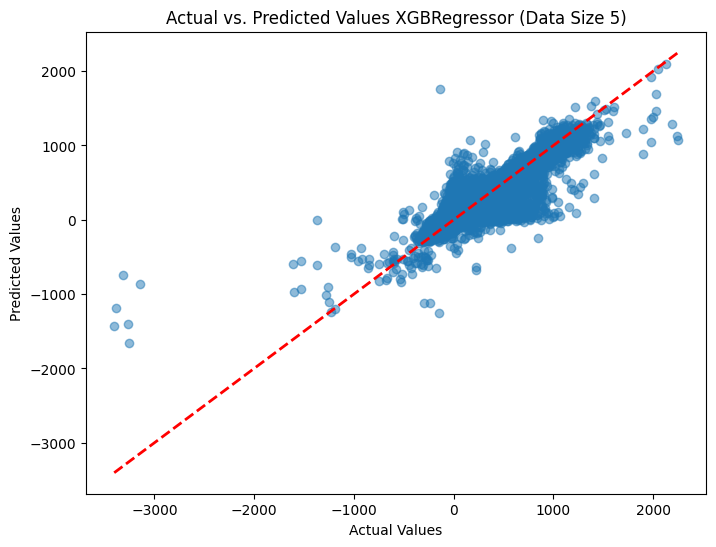

######### 5:10 ##########
Mean Absolute Error for 5/10: 97.85912261758095
Mean Squared Error for 5/10: 19039.77059052743
R-squared for 5/10: 0.4981686310386354


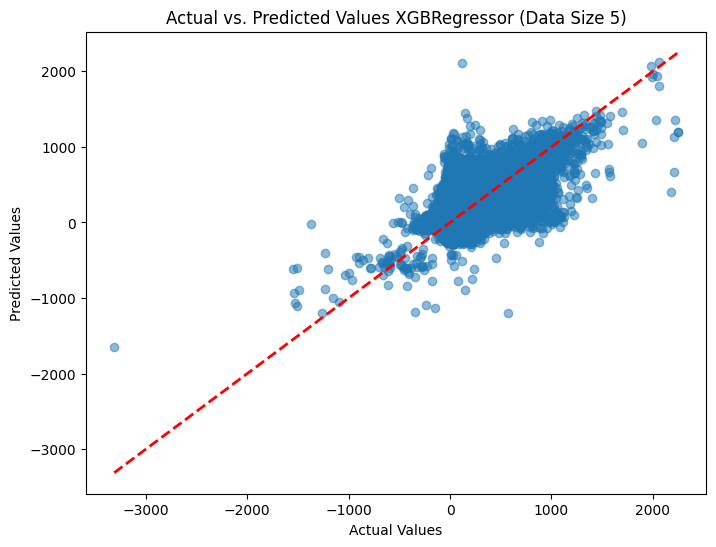

######### 5:15 ##########
Mean Absolute Error for 5/15: 126.09456428981382
Mean Squared Error for 5/15: 30946.728653498907
R-squared for 5/15: 0.21193459583521024


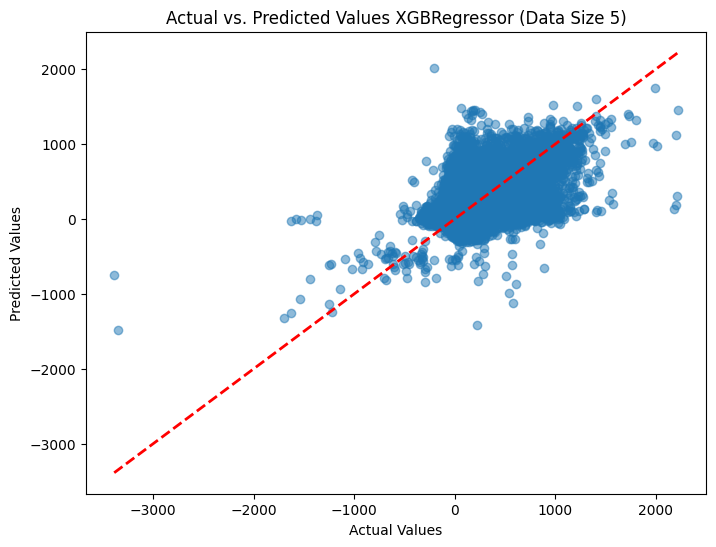

######### 5:20 ##########
Mean Absolute Error for 5/20: 140.41759296129766
Mean Squared Error for 5/20: 38347.843287636424
R-squared for 5/20: 0.00668274718538131


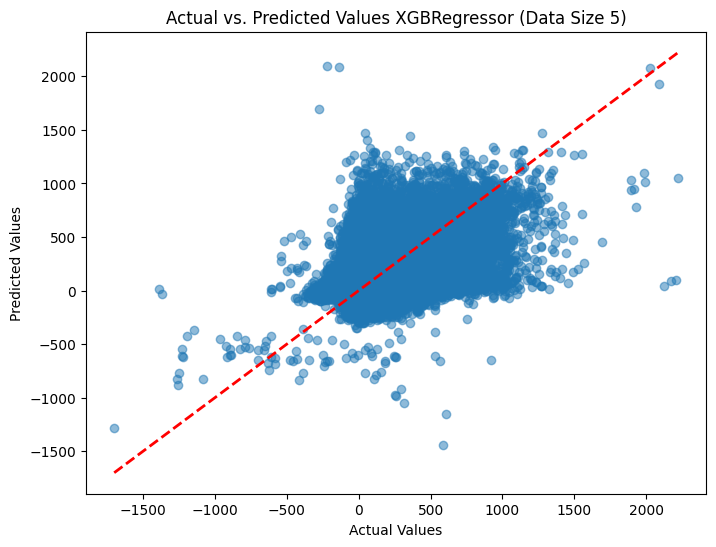

######### 10:5 ##########
Mean Absolute Error for 10/5: 80.20529013943971
Mean Squared Error for 10/5: 12463.777845725666
R-squared for 10/5: 0.6713419160041367


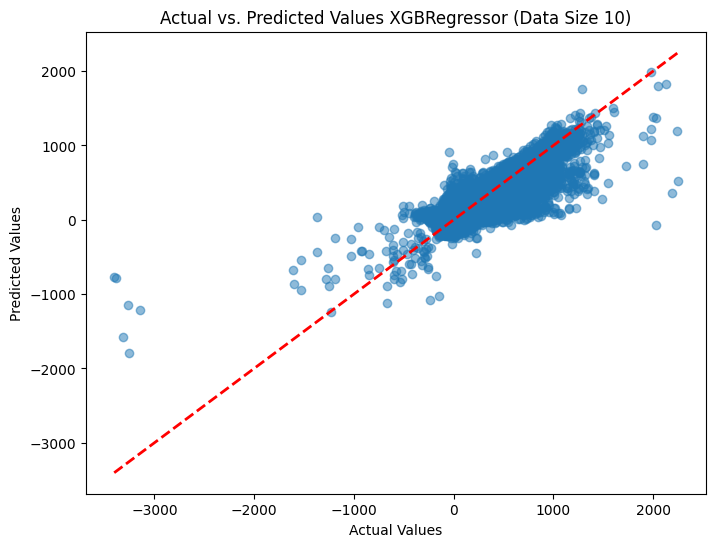

######### 10:10 ##########
Mean Absolute Error for 10/10: 81.6219030949462
Mean Squared Error for 10/10: 13269.127923590298
R-squared for 10/10: 0.6502655008809994


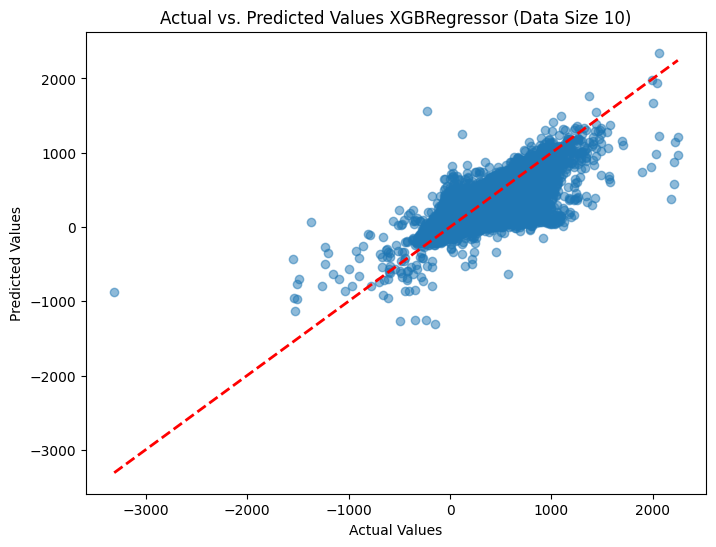

######### 10:15 ##########
Mean Absolute Error for 10/15: 115.40551420921605
Mean Squared Error for 10/15: 25448.296148791538
R-squared for 10/15: 0.35195341600233365


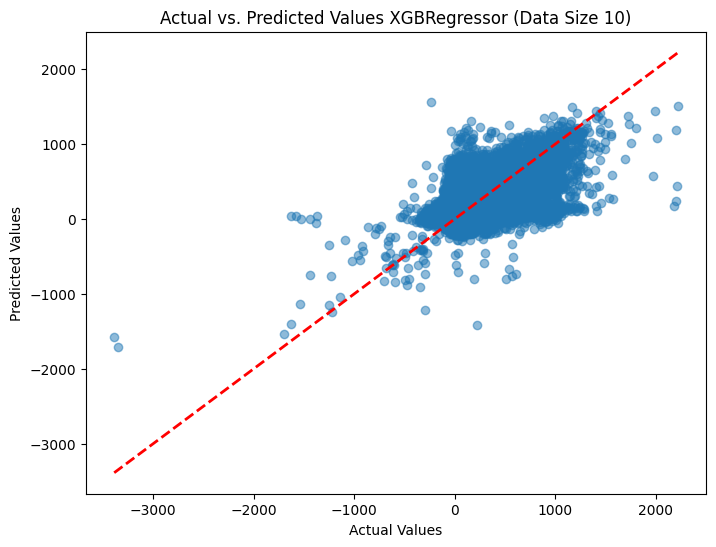

######### 10:20 ##########
Mean Absolute Error for 10/20: 135.6019826413732
Mean Squared Error for 10/20: 35103.63847683048
R-squared for 10/20: 0.09071679796801546


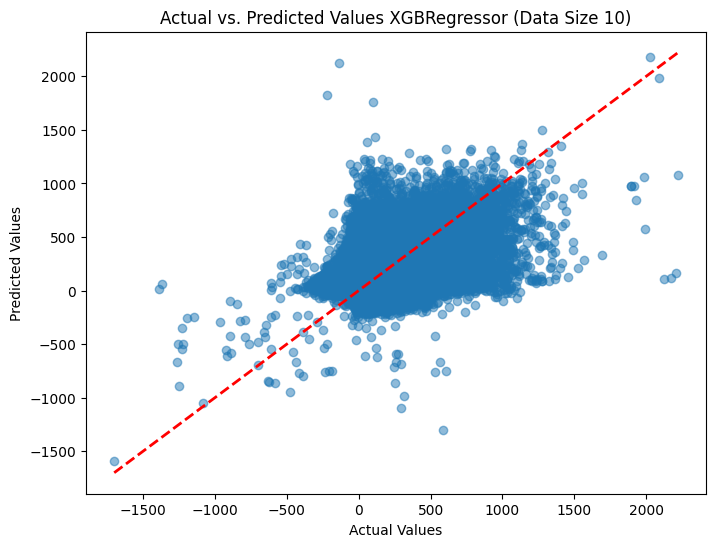

######### 15:5 ##########
Mean Absolute Error for 15/5: 94.91489029587987
Mean Squared Error for 15/5: 17295.963462619537
R-squared for 15/5: 0.5439217320102969


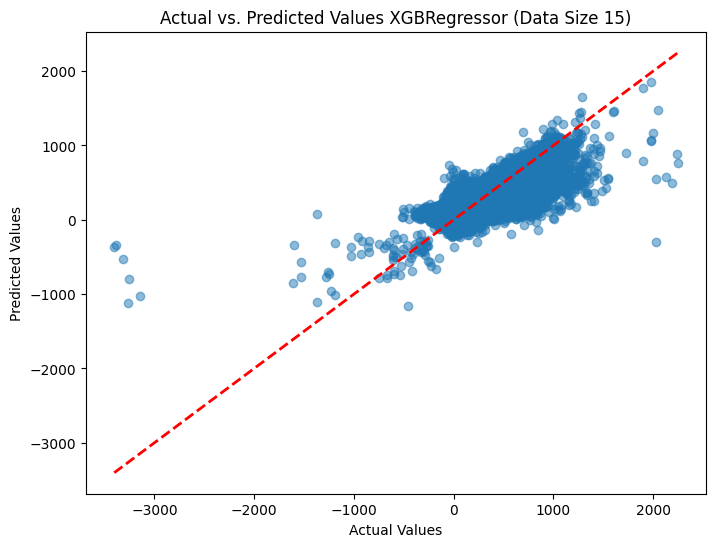

######### 15:10 ##########
Mean Absolute Error for 15/10: 102.17374629825932
Mean Squared Error for 15/10: 18945.64222531206
R-squared for 15/10: 0.5006495730305324


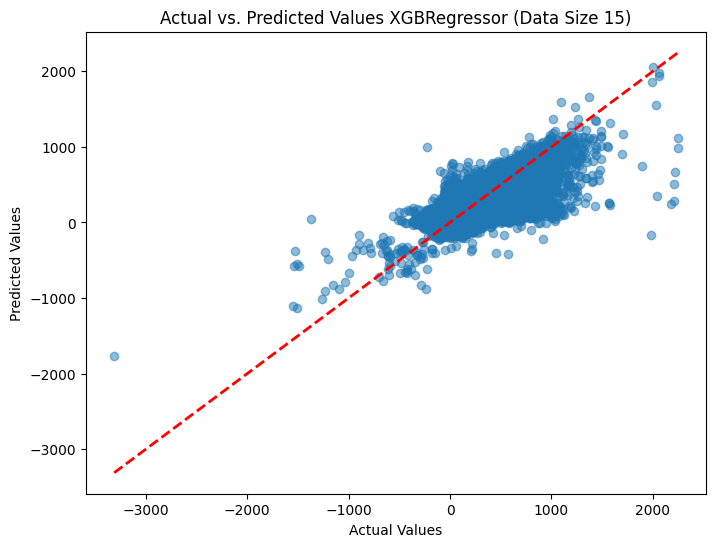

######### 15:15 ##########
Mean Absolute Error for 15/15: 102.21827701679844
Mean Squared Error for 15/15: 20032.88752362595
R-squared for 15/15: 0.48985801440731214


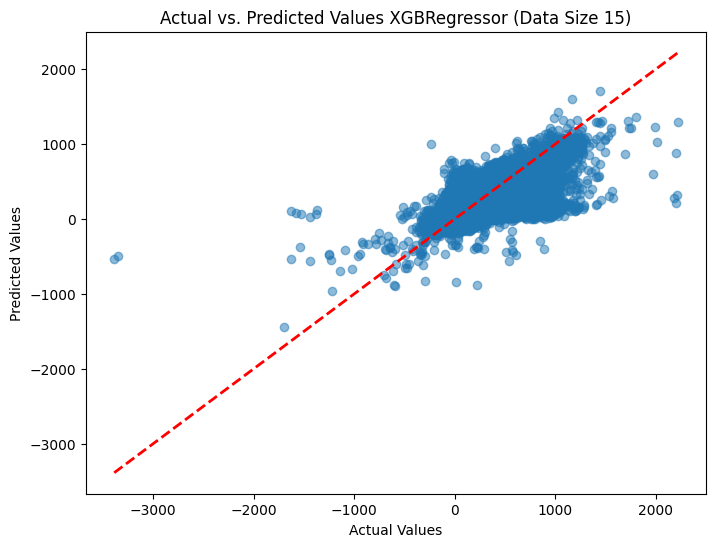

######### 15:20 ##########
Mean Absolute Error for 15/20: 125.56462546769437
Mean Squared Error for 15/20: 29534.633951244385
R-squared for 15/20: 0.23496971552520274


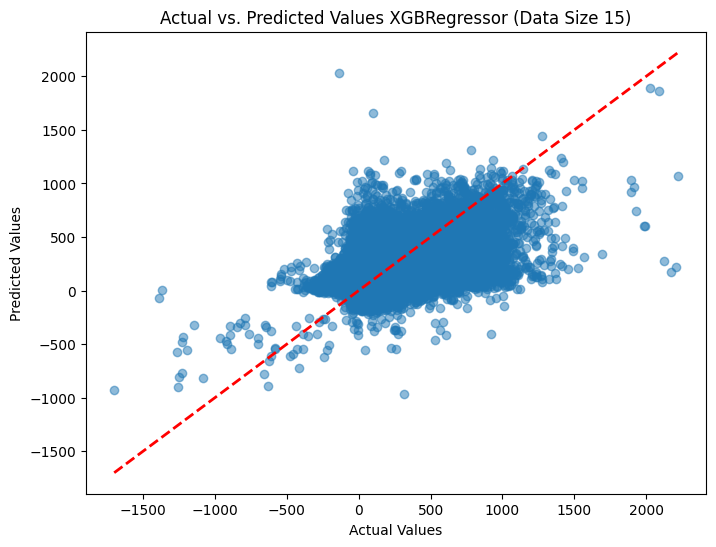

######### 20:5 ##########
Mean Absolute Error for 20/5: 101.32283401007687
Mean Squared Error for 20/5: 19856.166132867173
R-squared for 20/5: 0.476411598673538


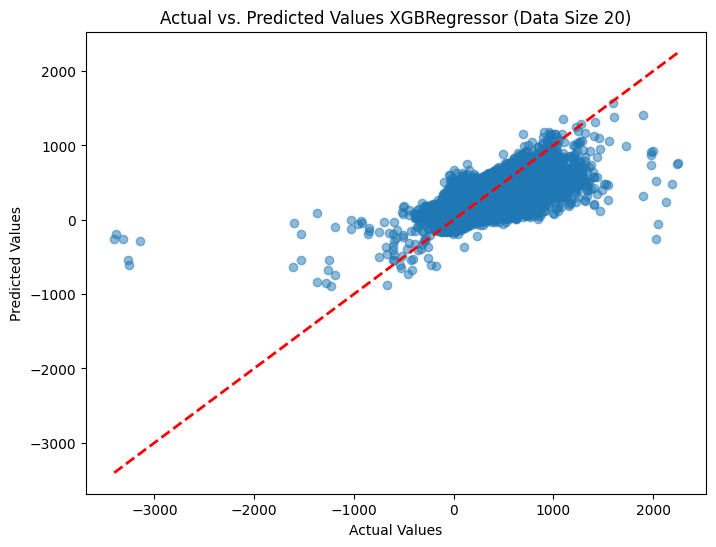

######### 20:10 ##########
Mean Absolute Error for 20/10: 113.23254201403975
Mean Squared Error for 20/10: 23319.53691234817
R-squared for 20/10: 0.38536679963513265


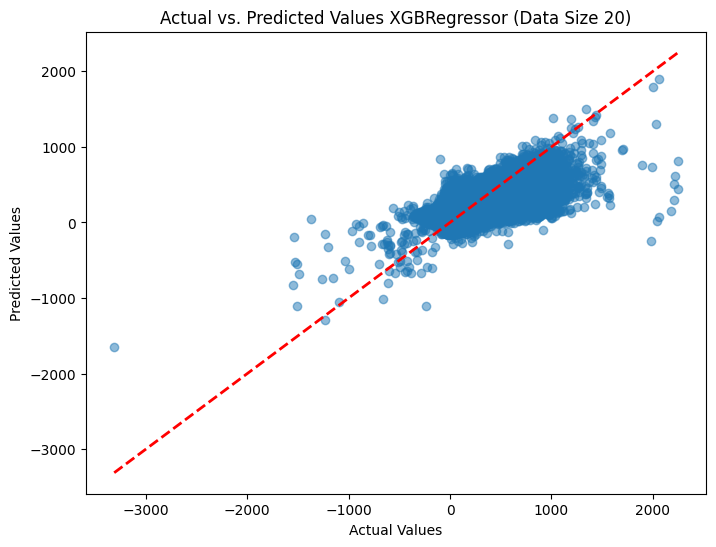

######### 20:15 ##########
Mean Absolute Error for 20/15: 118.00300558517502
Mean Squared Error for 20/15: 25246.49192458663
R-squared for 20/15: 0.3570924059515095


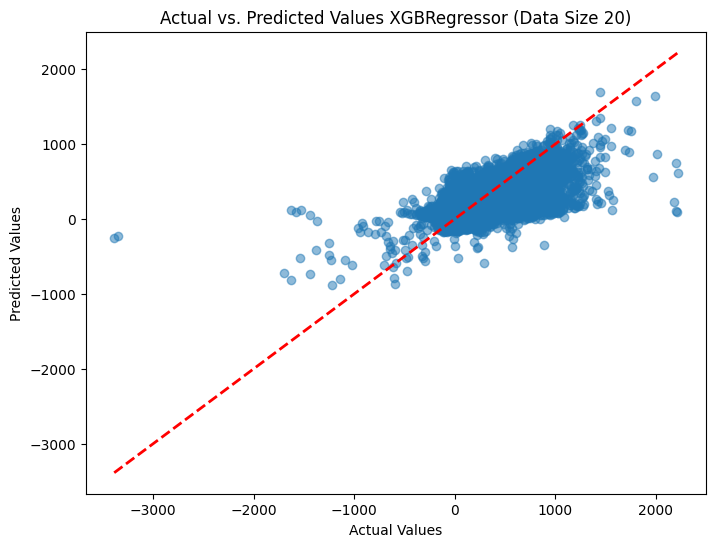

######### 20:20 ##########
Mean Absolute Error for 20/20: 114.32363734873661
Mean Squared Error for 20/20: 24614.209221872392
R-squared for 20/20: 0.36242258786018167


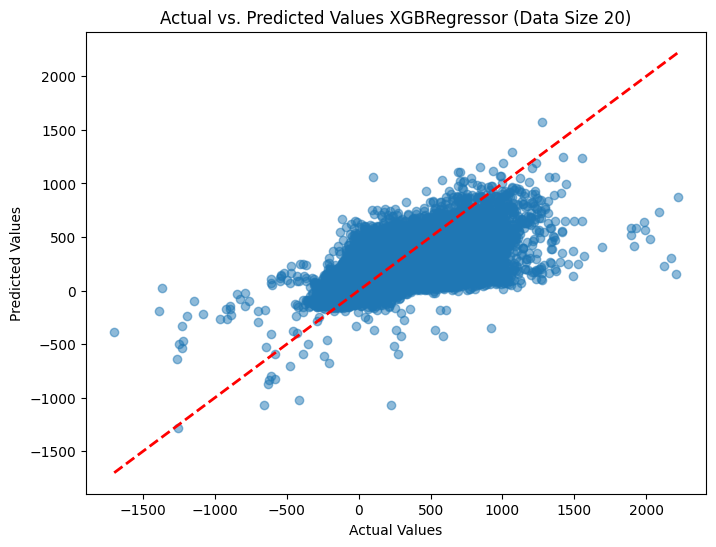

In [22]:
# Define the data sizes
data_sizes = [5, 10, 15, 20]

for size in data_sizes:
    # Create variable names based on the data size
    X_train_SAMPLE = globals()[f"X{size}_train_SAMPLE"]
    X_test_SAMPLE = globals()[f"X{size}_test_SAMPLE"]
    Y_train_SAMPLE = globals()[f"Y{size}_train_SAMPLE"]
    Y_test_SAMPLE = globals()[f"Y{size}_test_SAMPLE"]
    X_SAMPLE = globals()[f"X{size}_SAMPLE"]
    Y_SAMPLE = globals()[f"Y{size}_SAMPLE"]

    if size == 10:
      params = {
          'learning_rate': 0.2,
          'n_estimators': 400,
          'max_depth': 4,
          'gamma': 100
      }
    else:
      params = {
          'learning_rate': 0.2,
          'n_estimators': 400,
          'max_depth': 4,
          'gamma': 0.005
      }

    model = XGBRegressor(**params)


    # Train the best model on the training data
    model.fit(X_train_SAMPLE, Y_train_SAMPLE)

    for size_b in data_sizes:

      X_test_SAMPLE = globals()[f"X{size_b}_test_SAMPLE"]
      Y_test_SAMPLE = globals()[f"Y{size_b}_test_SAMPLE"]

      # Make predictions and evaluate the model
      y_pred = model.predict(X_test_SAMPLE)
      mae = mean_absolute_error(Y_test_SAMPLE, y_pred)
      mse = mean_squared_error(Y_test_SAMPLE, y_pred)
      r2 = r2_score(Y_test_SAMPLE, y_pred)

      print(f"######### {size}:{size_b} ##########")

      print(f"Mean Absolute Error for {size}/{size_b}: {mae}")
      print(f"Mean Squared Error for {size}/{size_b}: {mse}")
      print(f"R-squared for {size}/{size_b}: {r2}")

      # Visualization
      plt.figure(figsize=(8, 6))
      plt.scatter(Y_test_SAMPLE, y_pred, alpha=0.5)  # Plot actual vs. predicted values
      plt.xlabel("Actual Values")
      plt.ylabel("Predicted Values")
      plt.title(f"Actual vs. Predicted Values XGBRegressor (Data Size {size})")
      plt.plot([min(Y_test_SAMPLE), max(Y_test_SAMPLE)], [min(Y_test_SAMPLE), max(Y_test_SAMPLE)], linestyle='--', color='red', lw=2)
      plt.show()

What type of model is the best performer?

# 3. Model Optimization

Optimization of the parameters of the best performing model type.